In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [5]:
import keras
from keras import layers
model = keras.Sequential([
          layers.Dense(512,activation='relu'),
          layers.Dense(10,activation='softmax')
    ])


In [6]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(train_images,train_labels,validation_data=(test_images,test_labels), epochs=5,batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6327 - loss: 1.5356 - val_accuracy: 0.8698 - val_loss: 0.5941
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8693 - loss: 0.5594 - val_accuracy: 0.8921 - val_loss: 0.4310
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8889 - loss: 0.4332 - val_accuracy: 0.9029 - val_loss: 0.3715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8990 - loss: 0.3796 - val_accuracy: 0.9086 - val_loss: 0.3379
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9050 - loss: 0.3493 - val_accuracy: 0.9134 - val_loss: 0.3164


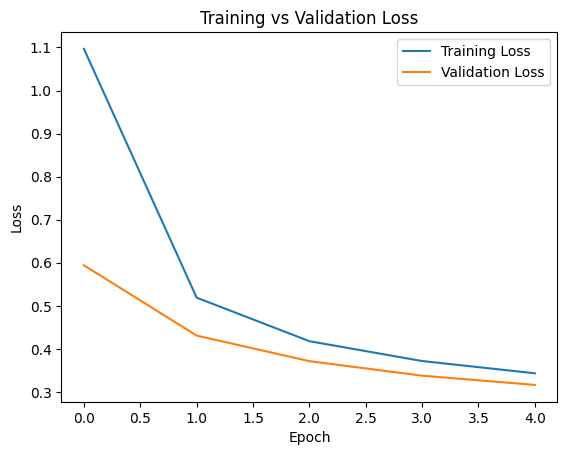

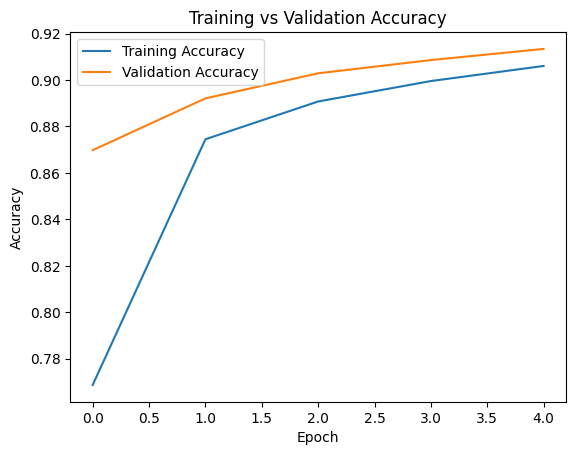

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [9]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8999 - loss: 0.3637


0.9133999943733215

### trying a different optimizer

In [10]:
import keras
from keras import layers
model = keras.Sequential([
          layers.Dense(512,activation='relu'),
          layers.Dense(10,activation='softmax')
    ])


In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(train_images,train_labels,validation_data=(test_images,test_labels), epochs=5,batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8659 - loss: 0.4728 - val_accuracy: 0.9599 - val_loss: 0.1365
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9651 - loss: 0.1212 - val_accuracy: 0.9735 - val_loss: 0.0908
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9782 - loss: 0.0731 - val_accuracy: 0.9774 - val_loss: 0.0749
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9860 - loss: 0.0499 - val_accuracy: 0.9778 - val_loss: 0.0703
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9896 - loss: 0.0361 - val_accuracy: 0.9801 - val_loss: 0.0633


In [13]:
test_digits=test_images[0:10]
predictions=model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([5.4982382e-07, 3.1951618e-08, 1.7746559e-05, 5.2223227e-04,
       5.6106414e-10, 6.5102432e-07, 1.9978780e-10, 9.9942958e-01,
       8.9873572e-07, 2.8114466e-05], dtype=float32)

In [14]:
predictions[0].argmax()

np.int64(7)

In [15]:
test_labels[0]

np.uint8(7)

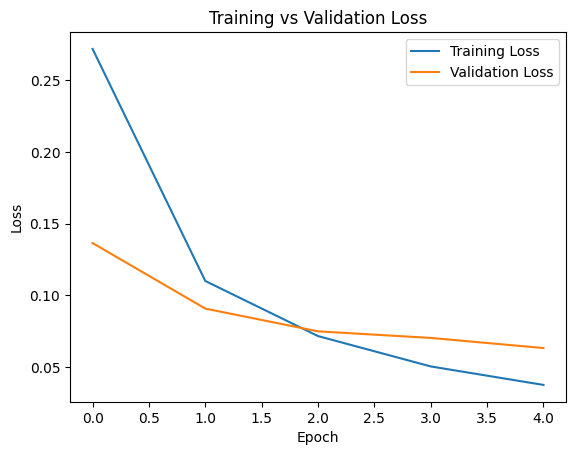

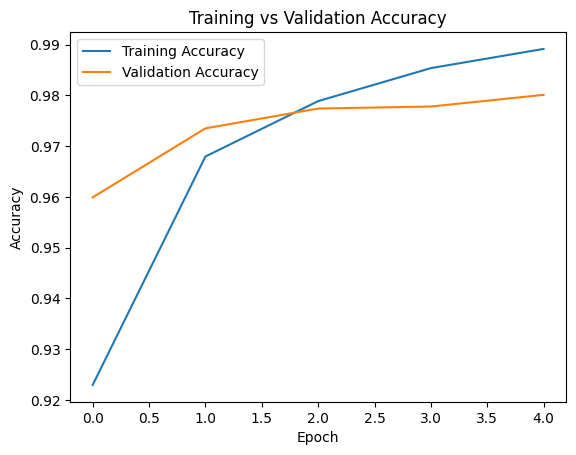

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [17]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0740


0.9800999760627747

### Achieving accuracy of 97.9% with slight overfitting

# Regression problem

In [18]:
from tensorflow.keras.datasets import boston_housing
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
x_train.shape

(404, 13)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [31]:
model = keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 580.5134 - mse: 580.5134 - val_loss: 585.9744 - val_mse: 585.9744
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 533.5211 - mse: 533.5211 - val_loss: 555.8202 - val_mse: 555.8202
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 513.2429 - mse: 513.2429 - val_loss: 517.9735 - val_mse: 517.9735
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 470.3977 - mse: 470.3977 - val_loss: 468.2474 - val_mse: 468.2474
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 423.8727 - mse: 423.8727 - val_loss: 403.8502 - val_mse: 403.8502
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 359.9857 - mse: 359.9857 - val_loss: 326.0255 - val_mse: 326.0255
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 293.4047 - mse: 293.4047 - val_loss: 238.5112 - val_mse: 238.5112
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 196.7806 - mse: 196.7806 - val_loss: 158.1399 - val_mse: 158.1399
Epoch 9/

In [32]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 15.0840 - mse: 15.0840
Test MAE: 20.61


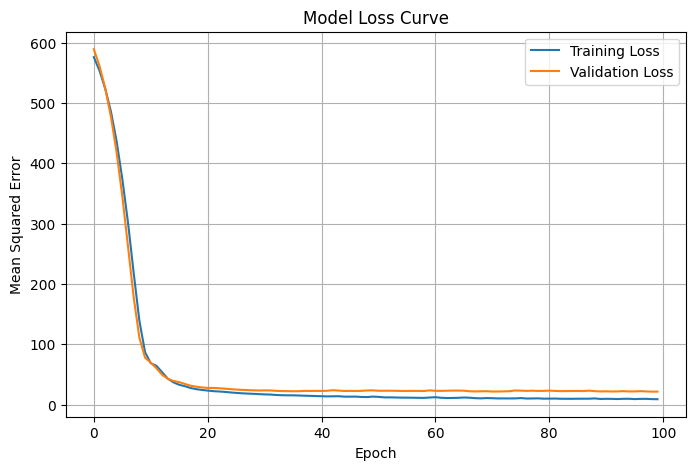

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


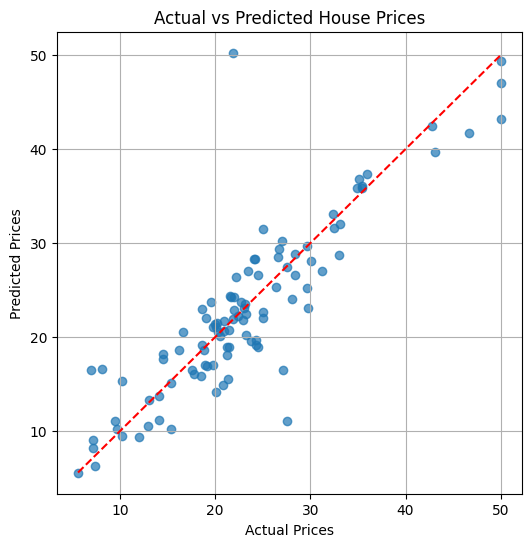

In [30]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

In [33]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0840 - mse: 15.0840
Test MAE: 20.61


### here we have an MSE of 15, let's try another arch

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 584.3782 - mse: 584.3782 - val_loss: 588.2123 - val_mse: 588.2123
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 543.5151 - mse: 543.5151 - val_loss: 564.1889 - val_mse: 564.1889
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 549.8123 - mse: 549.8123 - val_loss: 542.5139 - val_mse: 542.5139
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 489.9978 - mse: 489.9978 - val_loss: 523.3598 - val_mse: 523.3598
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 494.8497 - mse: 494.8497 - val_loss: 506.4521 - val_mse: 506.4521
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 465.0480 - mse: 465.0480 - val_loss: 491.7684 - val_mse: 491.7684
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 470.4823 - mse: 470.4823 - val_loss: 478.7924 - val_mse: 478.7924
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 445.6329 - mse: 445.6329 - val_loss: 467.5328 - val_mse: 467.5328
Epoch 9/

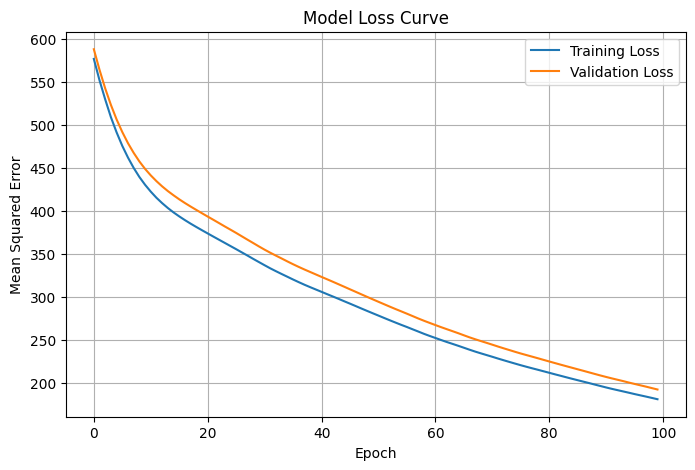

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


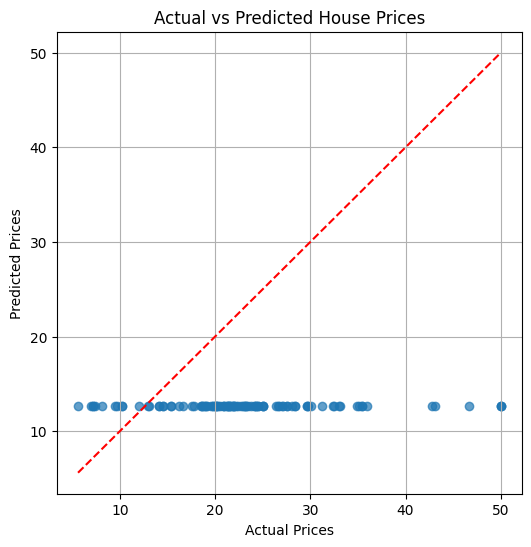

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 175.1938 - mse: 175.1938
Test MAE: 192.03


In [35]:
model = keras.Sequential([
    layers.Dense(128,activation='sigmoid'),
    layers.Dense(64,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### here we have much worse model, let's try another one

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 563.2551 - mse: 563.2551 - val_loss: 591.4926 - val_mse: 591.4927
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 569.2321 - mse: 569.2321 - val_loss: 574.1319 - val_mse: 574.1319
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 544.3940 - mse: 544.3940 - val_loss: 560.5304 - val_mse: 560.5304
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 526.1684 - mse: 526.1684 - val_loss: 546.3022 - val_mse: 546.3022
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 518.0380 - mse: 518.0380 - val_loss: 532.0051 - val_mse: 532.0051
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 508.2591 - mse: 508.2591 - val_loss: 517.9866 - val_mse: 517.9866
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 480.6686 - mse: 480.6686 - val_loss: 504.5296 - val_mse: 504.5296
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 486.0734 - mse: 486.0734 - val_loss: 490.5297 - val_mse: 490.5297
Epoch 9/

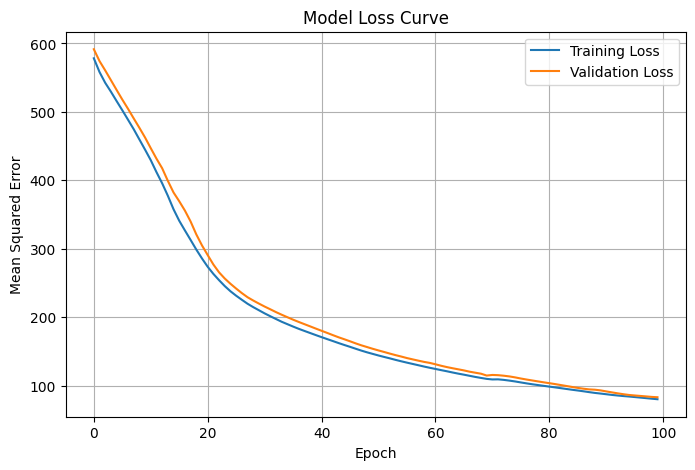

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


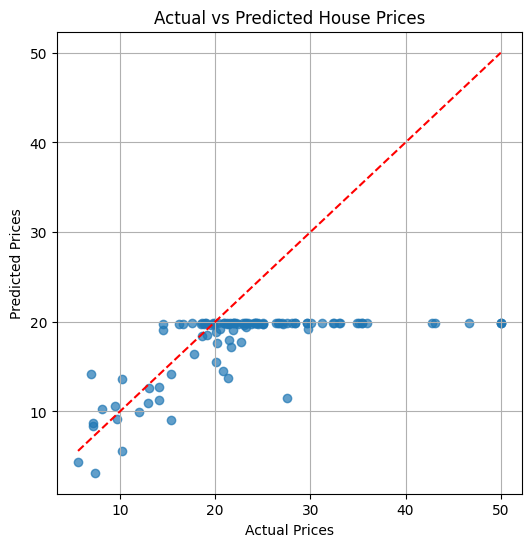

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 73.5652 - mse: 73.5652
Test MAE: 83.34


In [36]:
model = keras.Sequential([
    layers.Dense(128,activation='tanh'),
    layers.Dense(64,activation='tanh'),
    layers.Dense(32,activation='tanh'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### still bad, let's try another activation

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 574.7213 - mse: 574.7213 - val_loss: 595.6747 - val_mse: 595.6747
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 570.3499 - mse: 570.3499 - val_loss: 573.4355 - val_mse: 573.4355
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 534.8455 - mse: 534.8455 - val_loss: 547.3574 - val_mse: 547.3574
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 507.1097 - mse: 507.1097 - val_loss: 516.2720 - val_mse: 516.2720
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 480.5560 - mse: 480.5560 - val_loss: 478.1507 - val_mse: 478.1507
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 445.8471 - mse: 445.8471 - val_loss: 431.7984 - val_mse: 431.7984
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 387.6874 - mse: 387.6874 - val_loss: 377.8167 - val_mse: 377.8167
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 352.6239 - mse: 352.6239 - val_loss: 315.7179 - val_mse: 315.7179
Epoch 9/

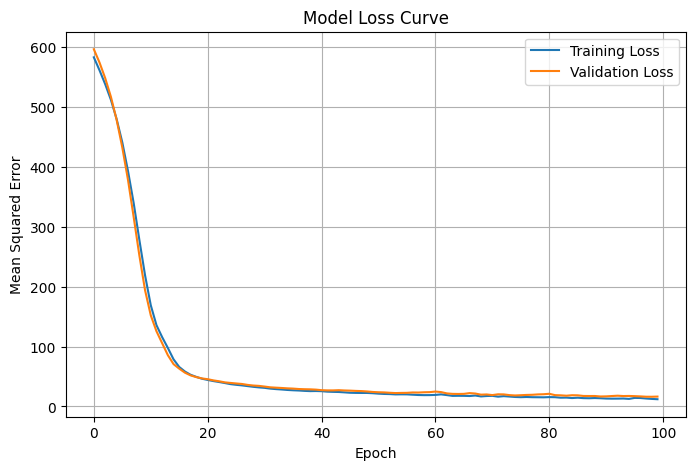

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


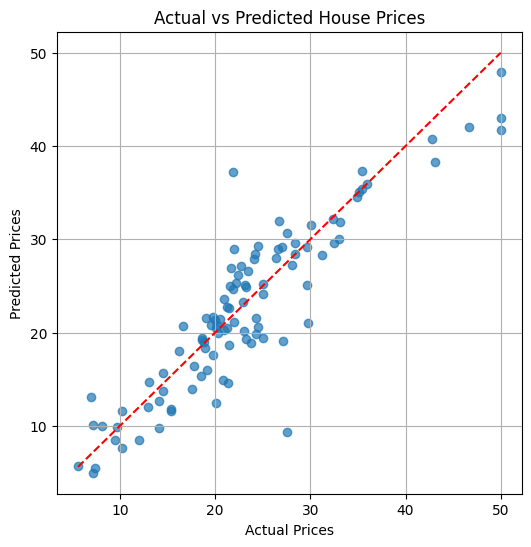

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.1808 - mse: 14.1808
Test MAE: 16.52


In [37]:
model = keras.Sequential([
    layers.Dense(128,activation='elu'),
    layers.Dense(64,activation='elu'),
    layers.Dense(32,activation='elu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### this one's showing mse of 14.18 which is better than relu one

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 584.8859 - mse: 584.8859 - val_loss: 582.1330 - val_mse: 582.1330
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 533.7474 - mse: 533.7474 - val_loss: 553.7784 - val_mse: 553.7784
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 520.6937 - mse: 520.6937 - val_loss: 516.8188 - val_mse: 516.8188
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 492.7213 - mse: 492.7213 - val_loss: 468.4524 - val_mse: 468.4524
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 412.5552 - mse: 412.5552 - val_loss: 405.1844 - val_mse: 405.1844
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 359.4941 - mse: 359.4941 - val_loss: 329.2484 - val_mse: 329.2484
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 289.1900 - mse: 289.1900 - val_loss: 243.3239 - val_mse: 243.3239
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 209.0854 - mse: 209.0854 - val_loss: 159.6845 - val_mse: 159.6845
Epoch 9/

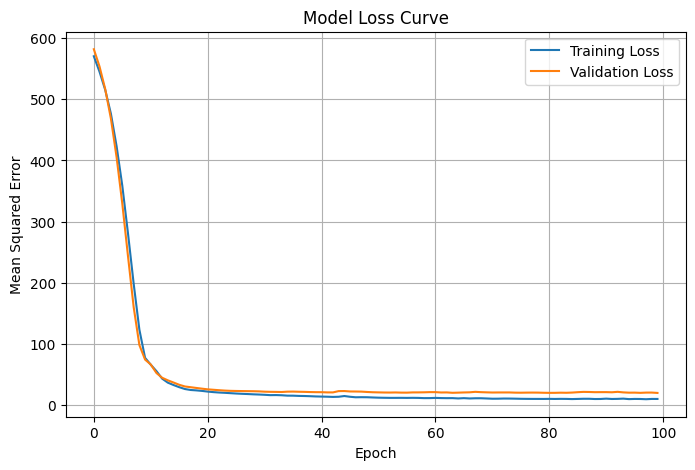

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


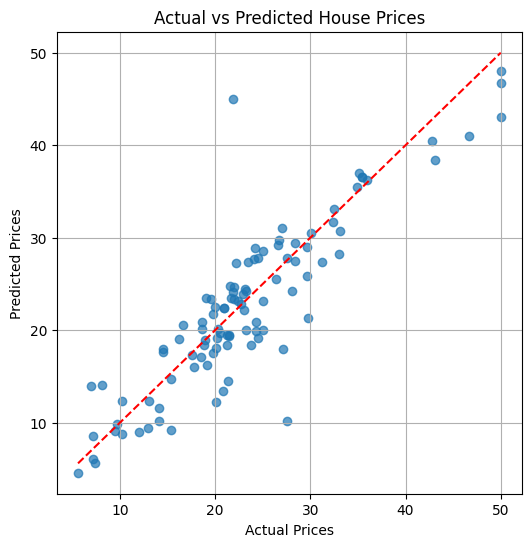

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.7522 - mse: 15.7522
Test MAE: 19.37


In [38]:
model = keras.Sequential([
    layers.Dense(128,activation='leaky_relu'),
    layers.Dense(64,activation='leaky_relu'),
    layers.Dense(32,activation='leaky_relu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### this one is slightly larger than relu one, would stik with elu, but let's try to change the optimizer function

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 553.0976 - mse: 553.0976 - val_loss: 530.1096 - val_mse: 530.1096
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 485.4513 - mse: 485.4513 - val_loss: 478.8350 - val_mse: 478.8350
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 430.9811 - mse: 430.9811 - val_loss: 406.6807 - val_mse: 406.6807
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 374.4944 - mse: 374.4944 - val_loss: 334.8035 - val_mse: 334.8035
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 296.3988 - mse: 296.3988 - val_loss: 271.3269 - val_mse: 271.3269
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 234.6280 - mse: 234.6280 - val_loss: 205.4904 - val_mse: 205.4904
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 178.3017 - mse: 178.3017 - val_loss: 161.7843 - val_mse: 161.7843
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 136.9199 - mse: 136.9199 - val_loss: 122.5486 - val_mse: 122.5486
Epoch 9/

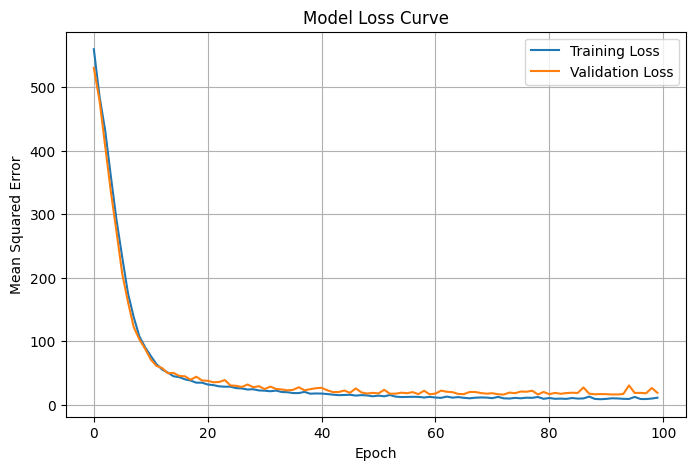

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


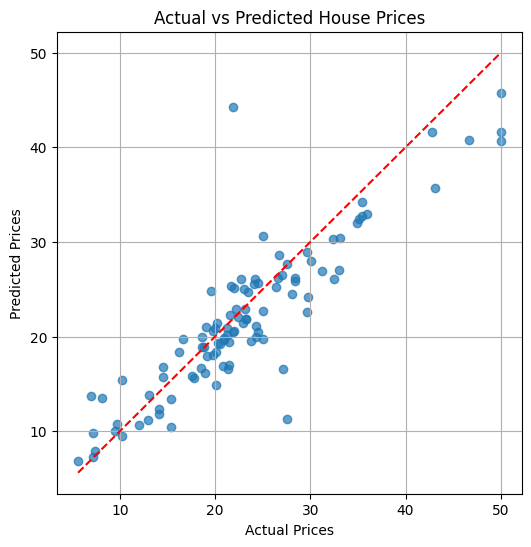

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.3710 - mse: 14.3710
Test MAE: 18.80


In [41]:
model = keras.Sequential([
    layers.Dense(128,activation='elu'),
    layers.Dense(64,activation='elu'),
    layers.Dense(32,activation='elu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### let's try another one

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 581.8483 - mse: 581.8483 - val_loss: 608.5883 - val_mse: 608.5883
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 576.6356 - mse: 576.6356 - val_loss: 598.5776 - val_mse: 598.5776
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 574.2509 - mse: 574.2509 - val_loss: 590.2673 - val_mse: 590.2673
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 558.3112 - mse: 558.3112 - val_loss: 582.2263 - val_mse: 582.2263
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 560.1820 - mse: 560.1820 - val_loss: 574.6967 - val_mse: 574.6967
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 528.6516 - mse: 528.6516 - val_loss: 567.1573 - val_mse: 567.1573
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 548.9100 - mse: 548.9100 - val_loss: 560.1959 - val_mse: 560.1959
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 511.5018 - mse: 511.5018 - val_loss: 553.0154 - val_mse: 553.0154
Epoch 9/

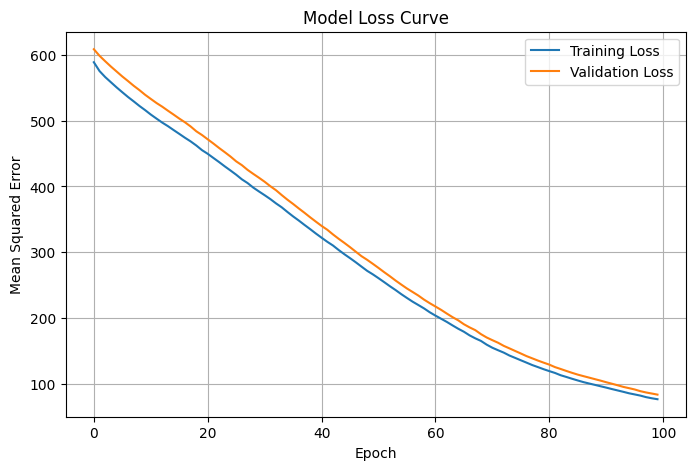

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


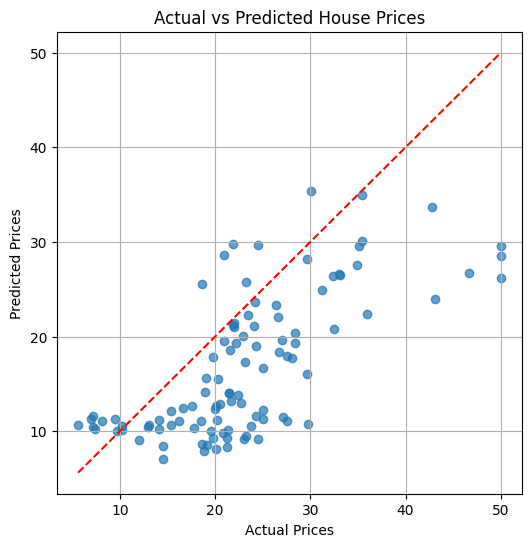

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 81.1026 - mse: 81.1026
Test MAE: 83.34


In [44]:
model = keras.Sequential([
    layers.Dense(128,activation='leaky_relu'),
    layers.Dense(64,activation='leaky_relu'),
    layers.Dense(32,activation='leaky_relu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adagrad',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### this one is much worse

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 586.8148 - mse: 586.8148 - val_loss: 591.4810 - val_mse: 591.4810
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 550.7860 - mse: 550.7860 - val_loss: 574.8998 - val_mse: 574.8998
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 559.0503 - mse: 559.0503 - val_loss: 557.6484 - val_mse: 557.6484
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 548.5524 - mse: 548.5524 - val_loss: 539.1805 - val_mse: 539.1805
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 484.9014 - mse: 484.9014 - val_loss: 518.6897 - val_mse: 518.6897
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 482.0267 - mse: 482.0267 - val_loss: 495.4360 - val_mse: 495.4360
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 465.9693 - mse: 465.9693 - val_loss: 468.8523 - val_mse: 468.8523
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 454.8867 - mse: 454.8867 - val_loss: 438.6755 - val_mse: 438.6755
Epoch 9/

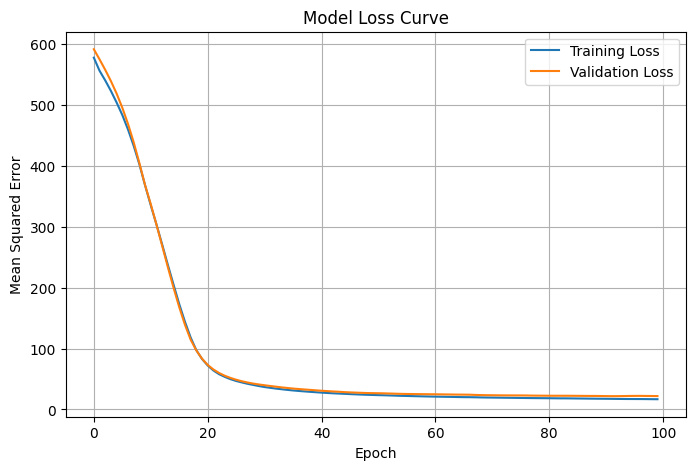

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


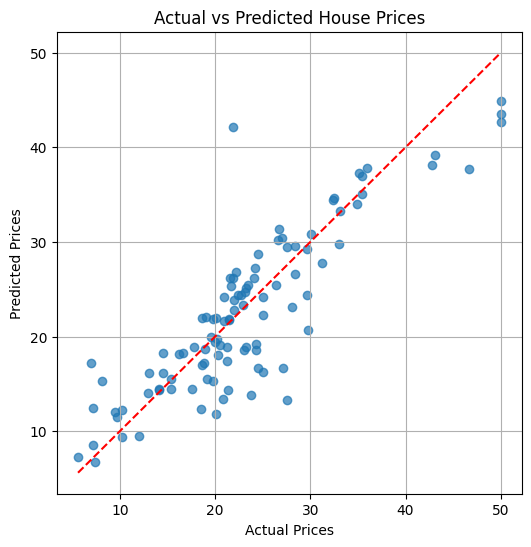

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.5962 - mse: 18.5962
Test MAE: 21.96


In [45]:
model = keras.Sequential([
    layers.Dense(128,activation='leaky_relu'),
    layers.Dense(64,activation='leaky_relu'),
    layers.Dense(32,activation='leaky_relu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adamax',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### not the best

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 576.2997 - mse: 576.2997 - val_loss: 547.6948 - val_mse: 547.6948
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 502.8067 - mse: 502.8067 - val_loss: 501.0033 - val_mse: 501.0033
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 447.1470 - mse: 447.1470 - val_loss: 442.5729 - val_mse: 442.5729
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 396.7194 - mse: 396.7194 - val_loss: 370.7688 - val_mse: 370.7688
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 334.4793 - mse: 334.4793 - val_loss: 302.5448 - val_mse: 302.5448
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 283.3094 - mse: 283.3094 - val_loss: 235.9111 - val_mse: 235.9111
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 197.4861 - mse: 197.4861 - val_loss: 187.6883 - val_mse: 187.6883
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 156.5274 - mse: 156.5274 - val_loss: 149.0687 - val_mse: 149.0687
Epoch 9/

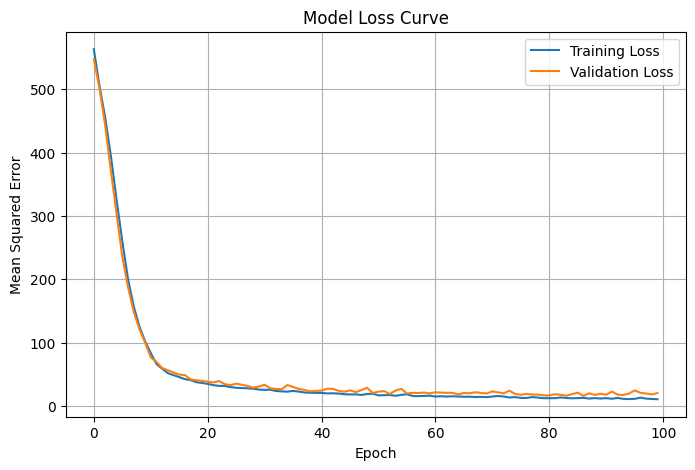

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


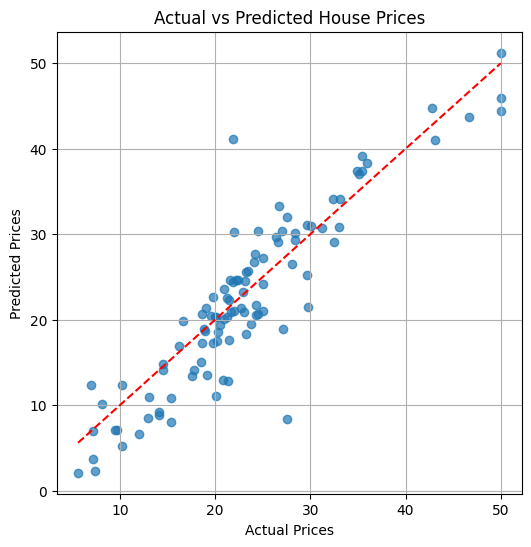

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.1863 - mse: 17.1863
Test MAE: 20.16


In [48]:
model = keras.Sequential([
    layers.Dense(128,activation='elu'),
    layers.Dense(64,activation='elu'),
    layers.Dense(32,activation='elu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### this one is less overfitting but has more mse

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 597.2655 - mse: 597.2654 - val_loss: 571.9618 - val_mse: 571.9618
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 543.3119 - mse: 543.3119 - val_loss: 534.1345 - val_mse: 534.1345
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 490.7985 - mse: 490.7985 - val_loss: 485.7431 - val_mse: 485.7431
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 451.3788 - mse: 451.3788 - val_loss: 443.7550 - val_mse: 443.7550
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 416.9478 - mse: 416.9478 - val_loss: 393.8694 - val_mse: 393.8694
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 360.2790 - mse: 360.2790 - val_loss: 343.3716 - val_mse: 343.3716
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 310.5287 - mse: 310.5287 - val_loss: 285.6903 - val_mse: 285.6903
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 253.5294 - mse: 253.5294 - val_loss: 227.7899 - val_mse: 227.7899
Epoch 9/

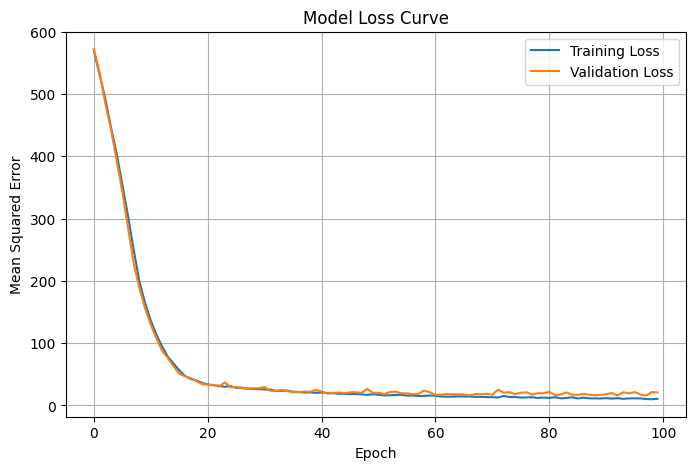

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


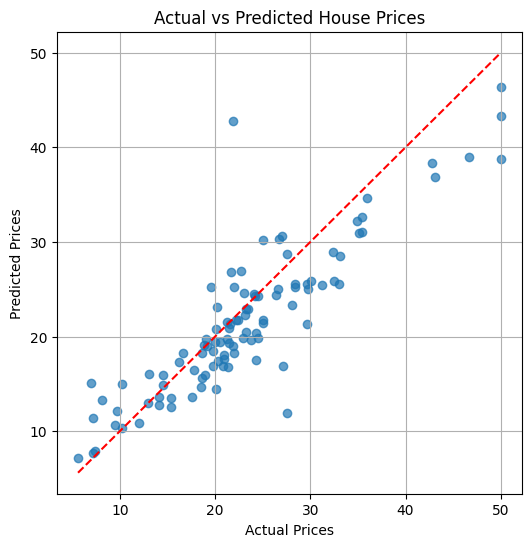

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17.4567 - mse: 17.4567
Test MAE: 20.91


In [49]:
model = keras.Sequential([
    layers.Dense(128,activation='elu'),
    layers.Dense(64,activation='elu'),
    layers.Dense(32,activation='elu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=100)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")

### the best one is the following

In [51]:
model = keras.Sequential([
    layers.Dense(128,activation='elu'),
    layers.Dense(64,activation='elu'),
    layers.Dense(32,activation='elu'),
    layers.Dense(1,activation='linear')
])
model.compile(optimizer='adam',loss='mse',metrics=['mse'])


In [54]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=100)



Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.6580 - mse: 8.6580 - val_loss: 16.0016 - val_mse: 16.0016
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.3308 - mse: 9.3308 - val_loss: 15.0545 - val_mse: 15.0545
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.3014 - mse: 9.3014 - val_loss: 14.4059 - val_mse: 14.4059
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.0002 - mse: 8.0002 - val_loss: 14.3963 - val_mse: 14.3963
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8103 - mse: 6.8103 - val_loss: 14.7891 - val_mse: 14.7891
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.2616 - mse: 8.2616 - val_loss: 15.4298 - val_mse: 15.4298
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.9722 - mse: 7.9722 - val_loss: 16.0693 - val_mse: 16.0693
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.4133 - mse: 8.4133 - val_loss: 15.0409 - val_mse: 15.0409
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss

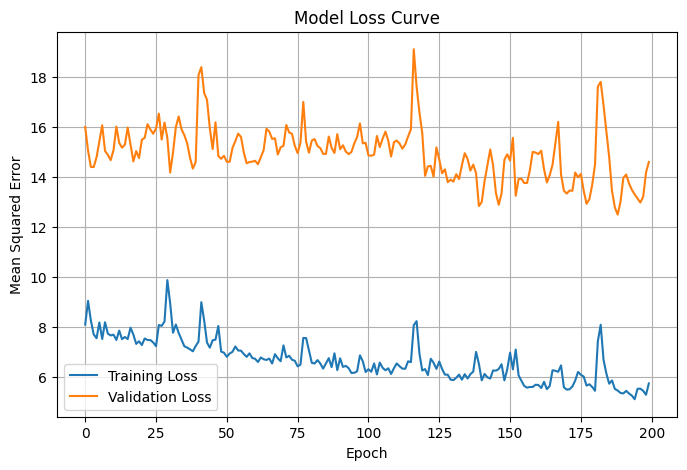

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


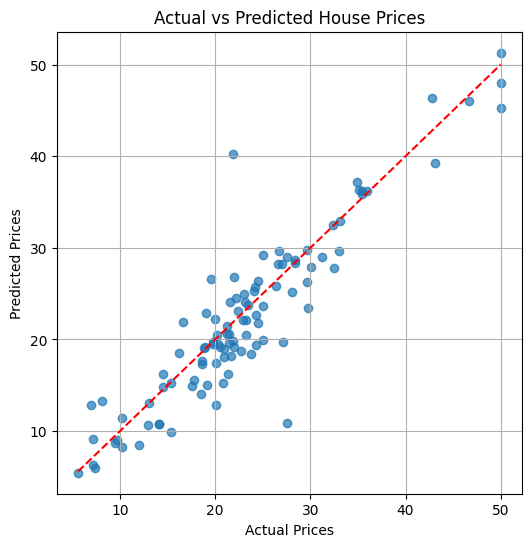

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9616 - mse: 11.9616
Test MAE: 14.60


In [55]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

y_pred = model.predict(x_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()

loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.2f}")